<a href="https://colab.research.google.com/github/Abhishekyes/InternShala-project/blob/main/IS_6_th_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/Problem Statement (6)/train.csv")

In [ ]:
data= Data.copy()

In [ ]:
X= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown


In [ ]:
data['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [ ]:
data['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [ ]:
data['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [ ]:
data['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa014c95390>,
      dtype=object)

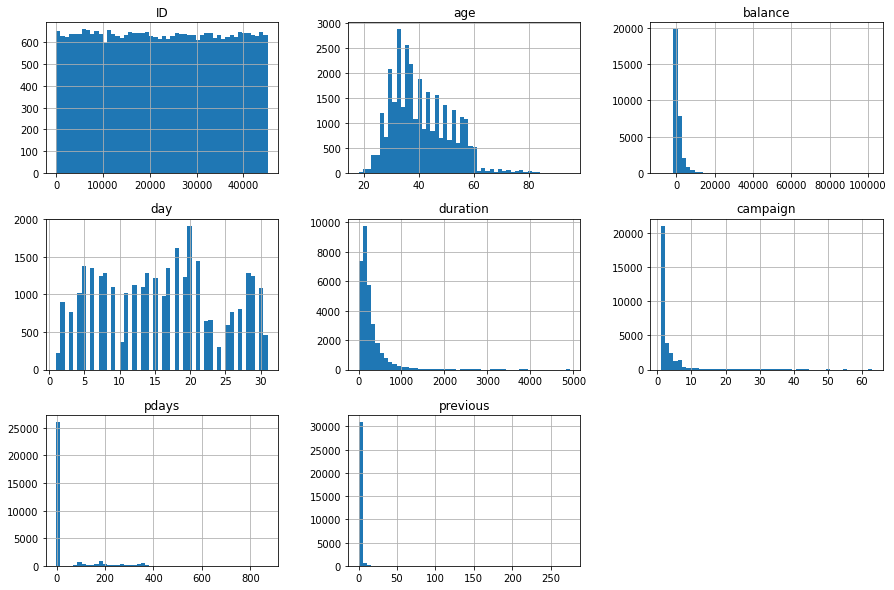

In [ ]:
data.hist(bins =50,figsize =(15,10))

its show age value is mid of 20-60 which most of client fall in group

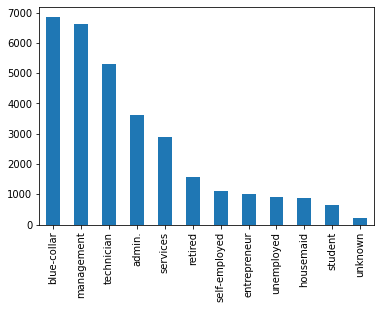

In [ ]:
data['job'].value_counts().plot.bar()

blue caller job has higher client .at student is least in number .

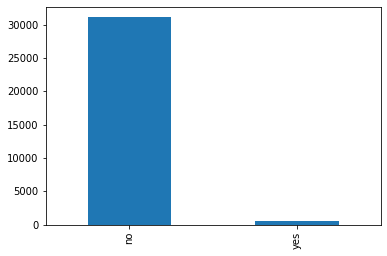

In [ ]:
data['default'].value_counts().plot.bar()

<90% client no default history . 

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

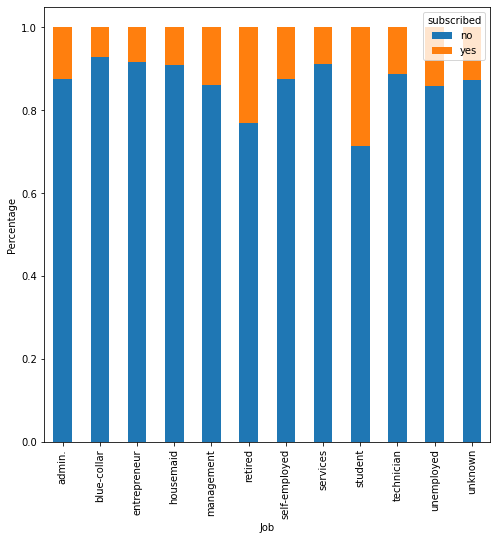

In [ ]:
print(pd.crosstab(data['job'],data['subscribed']))

job=pd.crosstab(data['job'],data['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

student and retired people high chance to subscribe to team deposite. but generallu student do not subscribe to team deposite ther is possible if the number of student data is less comperitively to other job .

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

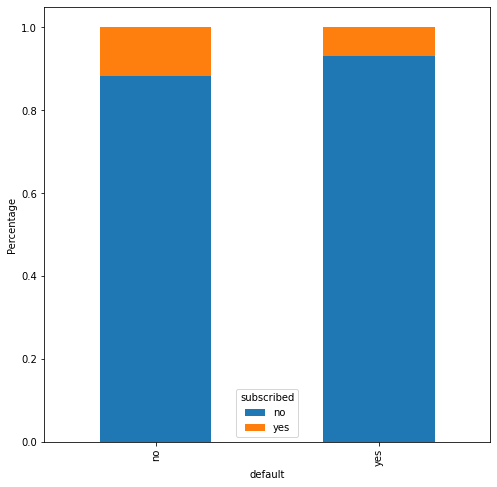

In [ ]:
print(pd.crosstab(data['default'],data['subscribed']))

default=pd.crosstab(data['default'],data['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

there show this graph who having no previous default have slighlty chances of subscribing to team loan as compare to client who have previous default history.

In [ ]:
data['subscribed'].replace('no',0,inplace=True)
data['subscribed'].replace('yes',1,inplace=True)

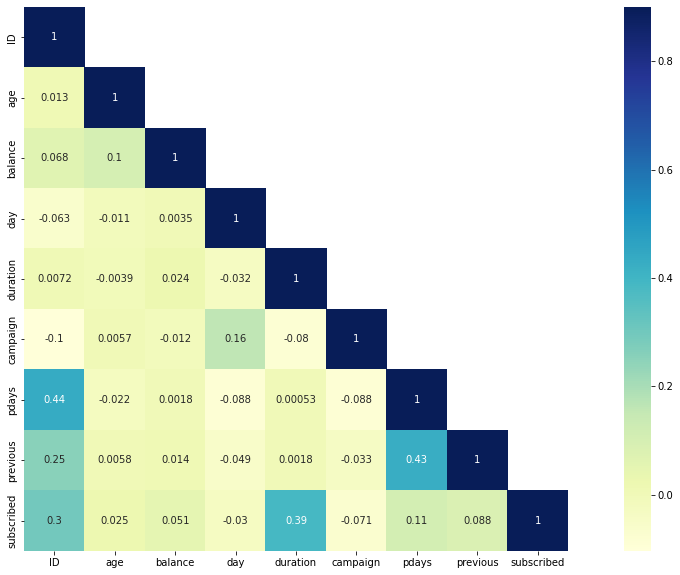

In [ ]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

duration of call is high corelated to the subscribing. increase duration of call than incrase the show intrest in team of deposit and high chances client will subscribe to deposite team.

# MODEK BUILDING

In [ ]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X = pd.get_dummies(x)

In [ ]:
Y = y.values.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 10)

### Logistic Regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('Scaleing',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state =0))])

In [ ]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('lr_classifier', LogisticRegression(random_state=0))])

In [ ]:
Y = y_test.values.reshape(len(y_test),1)

In [ ]:
y_pred = pipeline_lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[5469  117]
 [ 458  286]]


90.91627172195894

In [ ]:
from sklearn.model_selection import cross_val_score
def acc_scores(reg,independent,dependent):
  accuracies = cross_val_score(reg, independent, dependent, cv = 10, n_jobs =-1)
  print('scores:',accuracies)
  print('k-fold accuracy:{:.2f}%'.format(accuracies.mean()*100))
  print("standard Deviation:{:.2f}%".format(accuracies.std()*100))

In [ ]:
acc_scores(pipeline_lr,X_train,y_train)

scores: [0.90837283 0.90718799 0.90402844 0.8992891  0.90718799 0.89178515
 0.90442338 0.8972738  0.90320032 0.90715132]
k-fold accuracy:90.30%
standard Deviation:0.51%


###Decision Tree Classifier

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
pipeline_dt = Pipeline([('Scaleing', StandardScaler()),
                        ('Dictree_Classifier', DecisionTreeClassifier(random_state =0,
                                                                     criterion= 'entropy' ))])

In [ ]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('Dictree_Classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [ ]:
y_pred_cc = pipeline_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred_cc)*100

[[5469  117]
 [ 458  286]]


88.95734597156398

In [ ]:
acc_scores(pipeline_dt,X_train,y_train)

scores: [0.89415482 0.89336493 0.88112164 0.87598736 0.89139021 0.88586098
 0.89060032 0.88423548 0.87712367 0.88581588]
k-fold accuracy:88.60%
standard Deviation:0.61%


In [ ]:
y_pred_cc=pipeline_dt.predict(X)

###Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([('scaleing',StandardScaler()),
                        ('Rantree_classifier',RandomForestClassifier(random_state =0, criterion = 'entropy'))])

In [ ]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('scaleing', StandardScaler()),
                ('Rantree_classifier',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

In [ ]:
y_pred_=pipeline_rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[5469  117]
 [ 458  286]]


90.91627172195894

In [ ]:
acc_scores(pipeline_rf, X_train, y_train)

scores: [0.91469194 0.90205371 0.90521327 0.90521327 0.91627172 0.90837283
 0.91232227 0.90003951 0.91070723 0.90952193]
k-fold accuracy:90.84%
standard Deviation:0.50%


its highest accuracy 90.9162

###K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([('Scaleing',StandardScaler()),
                         ('KNN',KNeighborsClassifier(n_neighbors=5,metric ='minkowski',p = 2))])

In [ ]:
pipeline_knn.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('KNN', KNeighborsClassifier())])

In [ ]:
y_pred = pipeline_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[5420  166]
 [ 504  240]]


89.41548183254343

In [ ]:
acc_scores(pipeline_knn,X_train,y_train)

scores: [0.89454976 0.89296998 0.88625592 0.89415482 0.89494471 0.88388626
 0.89099526 0.88779139 0.89134729 0.88976689]
k-fold accuracy:89.07%
standard Deviation:0.35%


### SVM

In [ ]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([('Scaleing',StandardScaler()),
                         ('svm',SVC(kernel='linear',random_state =0))])

In [ ]:
pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('svm', SVC(kernel='linear', random_state=0))])

In [ ]:
y_pred=pipeline_svm.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[5489   97]
 [ 558  186]]


89.65244865718799

In [ ]:
acc_scores(pipeline_svm,X_train,y_train)

scores: [0.89968404 0.89652449 0.89375987 0.89099526 0.8957346  0.88823065
 0.89178515 0.8972738  0.894113   0.89885421]
k-fold accuracy:89.47%
standard Deviation:0.34%


###Naive base

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline_nb = Pipeline([('Scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('Scaling', StandardScaler()), ('nb', GaussianNB())])

In [ ]:
y_pred = pipeline_nb.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[5049  537]
 [ 339  405]]


86.1611374407583

In [ ]:
acc_scores(pipeline_nb,X_train,y_train)

scores: [0.86137441 0.84992101 0.83451817 0.84518167 0.84992101 0.85347551
 0.84755134 0.85144212 0.85499802 0.85381272]
k-fold accuracy:85.02%
standard Deviation:0.67%


#test data apply 

In [ ]:
T_data = pd.read_csv("/content/drive/MyDrive/Problem Statement (6)/test.csv")

In [ ]:
y = data.iloc[:,-1]

In [ ]:
y.shape

(31647,)

In [ ]:
X = T_data

In [ ]:
X = pd.get_dummies(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


In [ ]:
pipeline_lr = Pipeline([('Scaling', StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('Scaling',StandardScaler()),
                        ('dt_classi',DecisionTreeClassifier(random_state= 0, criterion = 'entropy'))])
pipeline_rf = Pipeline([('Scaling',StandardScaler()),
                        ('rf',RandomForestClassifier(random_state=0,criterion='entropy'))])
pipeline_knn = Pipeline([('Scaling',StandardScaler()),
                         ('knn',KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski',p=2))])
pipeline_svm = Pipeline([('Scaling',StandardScaler()),
                         ('svm',SVC(kernel ='rbf',random_state=0))])
pipeline_nb = Pipeline([('scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svm,pipeline_nb]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix,accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred= i.predict(X_test)
  print(j,':-')
  acc_scores(i,X_train,y_train)
  cm= confusion_matrix(y_test,y_pred)
  print(cm)
  print('Accuracy: {%:.4f}',format(accuracy_score(y_test,y_pred)*100))
  print("\n\n")

Logistic regression :-
scores: [0.90837283 0.90718799 0.90402844 0.8992891  0.90718799 0.89178515
 0.90442338 0.8972738  0.90320032 0.90715132]
k-fold accuracy:90.30%
standard Deviation:0.51%
[[5469  117]
 [ 458  286]]
Accuracy: {%:.4f} 90.91627172195894



dession tree :-
scores: [0.89415482 0.89336493 0.88112164 0.87598736 0.89139021 0.88586098
 0.89060032 0.88423548 0.87712367 0.88581588]
k-fold accuracy:88.60%
standard Deviation:0.61%
[[5242  344]
 [ 355  389]]
Accuracy: {%:.4f} 88.95734597156398



random forest :-
scores: [0.91469194 0.90205371 0.90521327 0.90521327 0.91627172 0.90837283
 0.91232227 0.90003951 0.91070723 0.90952193]
k-fold accuracy:90.84%
standard Deviation:0.50%
[[5443  143]
 [ 424  320]]
Accuracy: {%:.4f} 91.04265402843602



KNN :-
scores: [0.89454976 0.89296998 0.88625592 0.89415482 0.89494471 0.88388626
 0.89099526 0.88779139 0.89134729 0.88976689]
k-fold accuracy:89.07%
standard Deviation:0.35%
[[5420  166]
 [ 504  240]]
Accuracy: {%:.4f} 89.41548183254343


## Rndo forest best fit


# Predict value on full ds

In [ ]:
y_pred_rd = pipeline_rf.predict(X)

In [ ]:
Final_df = pd.DataFrame(columns =['ID','Predict_accuracy'])

In [ ]:
Final_df['ID']=data['ID']

In [ ]:
Final_df['Predict_accuracy']=y_pred_rd

In [ ]:
Final_df

,ID,Predict_accuracy
0,26110,0
1,40576,0
2,15320,0
3,43962,1
4,29842,0
...,...,...
31642,36483,0
31643,40178,1
31644,19710,0
31645,38556,0


In [ ]:
Final_df['Predict_accuracy'].replace(0,'no',inplace =True)
Final_df['Predict_accuracy'].replace(1,'yes',inplace =True)

In [ ]:
Final_df

,ID,Predict_accuracy
0,26110,no
1,40576,no
2,15320,no
3,43962,yes
4,29842,no
...,...,...
31642,36483,no
31643,40178,yes
31644,19710,no
31645,38556,no


#Export data frame

In [ ]:
Final_df.to_csv('Predict_Accuracy')

In [ ]:
predict_ac = pd.ExcelWriter('ACCURACY.xlsx')
Final_df.to_excel(predict_ac)
predict_ac.save()